## Deep Learning Fundamentals Assignment 2

### Importing Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets

### Loading and Preparing Dataset

In [2]:
import torchvision
import torchvision.transforms as transforms

cinic_dir = 'D:/MDS/2023/4th Tri-3/DLF/Ass2/DS_10283_3192'
traindir = cinic_dir + '/train'
validatedir = cinic_dir + '/valid'
testdir = cinic_dir + '/test'

cinic_mean = [0.47889522, 0.47227842, 0.43047404]
cinic_std = [0.24205776, 0.23828046, 0.25874835]
normalize = transforms.Normalize(mean=cinic_mean, std=cinic_std)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

trainset = datasets.ImageFolder(root=traindir, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=2)

validateset = datasets.ImageFolder(root=validatedir, transform=transform)
validateloader = torch.utils.data.DataLoader(validateset,
                                             batch_size=64,
                                             shuffle=True,
                                             num_workers=2)

testset = datasets.ImageFolder(root=testdir, transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=64,
                                         shuffle=True,
                                         num_workers=2)

classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### Ensuring GPU is being used to train

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### Printing some training images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


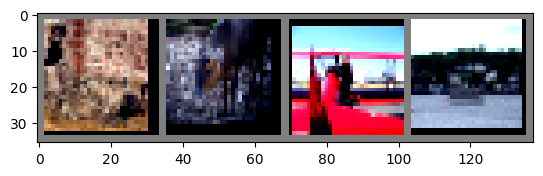

  dog  deer airplane  ship


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# select the first 4 images
images = images[:4]
labels = labels[:4]

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Defining the Convolutional Neural Network

In [10]:
import time
import torchvision.models as models


# Number of classes in your custom dataset (CINIC-10)
num_classes = 10
# Define your custom classification head
class EfficientNetClassifier(nn.Module):
    def __init__(self, num_classes, feature_size):
        super(EfficientNetClassifier, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(feature_size, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

efficientnet_model = EfficientNet.from_pretrained('efficientnet-b0')
# Remove the original classification head (top)
efficientnet_model = efficientnet_model.features

# Freeze the parameters of the pretrained model
for param in efficientnet_model.parameters():
    param.requires_grad = False

# Create the custom classification model
custom_EffiNetModel = nn.Sequential(
    efficientnet_model,
    EfficientNetClassifier(num_classes, feature_size=1280)  # The feature size depends on the specific EfficientNet variant
)

# Print the model architecture
print(custom_EffiNetModel)


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to C:\Users\adity/.cache\torch\hub\checkpoints\efficientnet-b0-355c32eb.pth
100.0%


Loaded pretrained weights for efficientnet-b0


AttributeError: 'EfficientNet' object has no attribute 'features'

In [ ]:
class CustomClassifierVGG(nn.Module):
    def __init__(self, num_classes):
        super(CustomClassifierVGG, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),  # Adjust input size based on the VGG variant you are using
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the feature maps
        x = self.classifier(x)
        return x

# Load the VGG16 model with pre-trained weights
vgg_model = models.vgg16(pretrained=True)

# Remove the original classification head
vgg_model = vgg_model.features

# Freeze the parameters of the pretrained model
for param in vgg_model.parameters():
    param.requires_grad = False

# Number of classes in your custom dataset
num_classes = 10  # Adjust as needed

# Create the custom classification model
custom_vgg_model = nn.Sequential(
    vgg_model,
    CustomClassifierVGG(num_classes)
)

# Print the model architecture
print(custom_vgg_model)

In [ ]:
# Define your custom classification head
class CustomClassifierResNet(nn.Module):
    def __init__(self, num_classes):
        super(CustomClassifierResNet, self).__init__()
        self.fc = nn.Linear(512, num_classes)  # Output size depends on the specific ResNet variant used

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the feature maps
        x = self.fc(x)
        return x

# Load the ResNet18 model with pre-trained weights
resnet_model = models.resnet18(pretrained=True)

# Remove the original classification head
resnet_model = nn.Sequential(*list(resnet_model.children())[:-1])

# Freeze the parameters of the pretrained model
for param in resnet_model.parameters():
    param.requires_grad = False

# Number of classes in your custom dataset
num_classes = 10  # Adjust as needed

# Create the custom classification model
custom_resnet_model = nn.Sequential(
    resnet_model,
    CustomClassifierResNet(num_classes)
)

# Print the model architecture
print(custom_resnet_model)

In [ ]:

# import torch.nn.functional as F


# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, 3)
#         self.conv2 = nn.Conv2d(32, 32, 3)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.dropout1 = nn.Dropout2d(0.2)
#         self.conv3 = nn.Conv2d(32, 64, 3)
#         self.pool2 = nn.MaxPool2d(2, 2)
#         self.conv4 = nn.Conv2d(64, 128, 3)
#         self.conv5 = nn.Conv2d(128, 128, 3)
#         self.pool3 = nn.MaxPool2d(2, 2)
#         self.dropout2 = nn.Dropout2d(0.2)
#         self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4))
#         self.fc1 = nn.Linear(128 * 4 * 4, 128)
#         self.fc2 = nn.Linear(128, 64)
#         self.fc3 = nn.Linear(64, 16)
#         self.dropout3 = nn.Dropout(0.2)
#         self.fc4 = nn.Linear(16, 10)

#     def forward(self, x):
#         x = x.to(self.conv1.weight.device)  # add this line
#         x = F.relu(self.conv1(x))
#         # print(x.shape)
#         x = F.relu(self.conv2(x))
#         # print(x.shape)
#         x = self.pool(x)
#         x = self.dropout1(x)
#         x = F.relu(self.conv3(x))
#         # print(x.shape)
#         x = self.pool2(x)
#         x = F.relu(self.conv4(x))
#         # print(x.shape)
#         x = F.relu(self.conv5(x))
#         # print(x.shape)
#         x = self.pool3(x)
#         x = self.dropout2(x)
#         x = self.adaptive_pool(x)
#         x = x.view(-1, 128 * 4 * 4)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
#         x = self.dropout3(x)
#         x = self.fc4(x)
#         return x

# net = Net()
# print(net)


In [ ]:

import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)


In [ ]:
#TODO CHECK THE ERROR OM TORCHVIEW

### Visualizing the model

In [ ]:
# #https://torchview.dev/
# #https://github.com/mert-kurttutan/torchview
from torchview import draw_graph
model_graph = draw_graph(net, input_size=(3,32,32), expand_nested=True)
model_graph.visual_graph

In [ ]:
from torchsummary import summary

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = Net().to(device)
summary(net, input_size=(3, 32, 32))

In [ ]:
#https://appsilon.com/visualize-pytorch-neural-networks/
#TODO Visulaize
# from torchviz import make_dot

# model = Net()
# y = model(X)

In [ ]:
# from torchviz import make_dot
# #https://stackoverflow.com/questions/52468956/how-do-i-visualize-a-net-in-pytorch

# #Backward pass apparently,
# # TODO check on this later
# batch = next(iter(dataloader_train))
# yhat = model(batch.text) # Give dummy batch to forward().

# make_dot(yhat, params=dict(list(model.named_parameters()))).render("cnn_torchviz", format="png")



In [ ]:
# import hiddenlayer as hl
# #https://stackoverflow.com/questions/52468956/how-do-i-visualize-a-net-in-pytorch

# #Forward pass apparently,
# # TODO check on this later
# transforms = [ hl.transforms.Prune('Constant') ] # Removes Constant nodes from graph.

# graph = hl.build_graph(model, batch.text, transforms=transforms)
# graph.theme = hl.graph.THEMES['blue'].copy()
# graph.save('rnn_hiddenlayer', format='png')

### Defining a Loss function and optimizer

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)
# torch.cuda.empty_cache()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)
# inputs = inputs.to(device)
# outputs = net(inputs)
print(device)

### Training the model

In [ ]:


def accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    return correct / total
             
def recall(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    true_positives = ((predicted == labels) & (labels == 1)).sum().item()
    false_negatives = ((predicted != labels) & (labels == 1)).sum().item()
    denominator = true_positives + false_negatives
    if denominator == 0:
        return 0
    else:
        return true_positives / denominator

def precision(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    true_positives = ((predicted == labels) & (labels == 1)).sum().item()
    false_positives = ((predicted != labels) & (labels == 0)).sum().item()
    denominator = true_positives + false_positives
    if denominator == 0:
        return 0
    else:
        return true_positives / denominator
    
def show_train_acc(dictionary_val, dictionary_acc, dictionary_loss, dictionary_lr):
    fig, ax1 = plt.subplots()

    fig.set_figheight(20)
    fig.set_figwidth(20)

    ax1.set_title('Training/Validation Accuracy & Loss / Learning Rate', fontsize=20)

    ax2 = ax1.twinx()
    ax2.figure.figsize=(120,120)

    l1, = ax1.plot(list(dictionary_val.keys()), list(dictionary_val.values()), 'g-')
    l2, = ax1.plot(list(dictionary_acc.keys()), list(dictionary_acc.values()), 'b-')
    l3, = ax2.plot(list(dictionary_loss.keys()), list(dictionary_loss.values()), 'r--')
    l4, = ax2.plot(list(dictionary_lr.keys()), list(dictionary_lr.values()), 'ro')

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    ax1.tick_params(axis='both', which='major', labelsize=20)
    ax2.tick_params(axis='y', which='major', labelsize=20)

    ax1.set_xlabel('Epoch', fontsize=20)
    ax1.set_ylabel('Accuracy', fontsize=20, color='#008888')
    ax2.set_ylabel('Loss / rate', fontsize=20, color='r')
    ax2.set_yscale("log")

    ax1.grid(axis='both', which='both')
    plt.legend(handles=[l1, l2, l3, l4],
               labels=['Validation Accuracy', 'Train Accuracy', 'Loss', 'learning rate'], fontsize=20, loc='right')

    plt.show()
        
def train_model_one_epoch(model, trainloader, optimizer, criterion, device):
    model.train()
    
    result = {'loss': 0,
             'accuracy': 0,
             'recall': 0,
             'precision': 0}
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        result['loss'] += loss.item()
        result['accuracy'] += accuracy(outputs, labels)
        result['recall'] += recall(outputs, labels)
        result['precision'] += precision(outputs, labels)

        loss.backward()
        optimizer.step()
        
    result = {k: v / len(trainloader) for k, v in result.items()}
    return result 

def valid_model(model, validloader, criterion, device):
    result = {'loss': 0,
             'accuracy': 0,
             'recall': 0,
             'precision': 0}
    model.eval()
    with torch.no_grad():
        for i, data in enumerate(validloader):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            loss = criterion(outputs, labels)
            result['loss'] += loss.item()
            result['accuracy'] += accuracy(outputs, labels)
            result['recall'] += recall(outputs, labels)
            result['precision'] += precision(outputs, labels)

    result = {k: v / len(validloader) for k, v in result.items()}
    return result

def train_model(model, trainloader, validloader, optimizer, criterion, num_epochs, device, patience=5):
    best_valid_perform = None
    train_acc = {}
    valid_acc = {}
    train_loss = {}
    valid_loss = {}
    lr = {}
    no_improvement_count = 0
    for epoch in range(num_epochs):
        train_perform = train_model_one_epoch(model, trainloader, optimizer, criterion, device)
        valid_perform = valid_model(model, validloader, criterion, device)
        if best_valid_perform is None or valid_perform['loss'] < best_valid_perform['loss']:
            best_valid_perform = valid_perform
            torch.save(model.state_dict(), 'best_valid.pt')
            no_improvement_count = 0
        else:
            no_improvement_count += 1
            if no_improvement_count >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break
        print(f'Epoch {epoch+1}: Train Loss={train_perform["loss"]:.4f}, Train Acc={train_perform["accuracy"]:.4f}, Valid Loss={valid_perform["loss"]:.4f}, Valid Acc={valid_perform["accuracy"]:.4f}')
        train_acc[epoch+1] = train_perform['accuracy']
        valid_acc[epoch+1] = valid_perform['accuracy']
        train_loss[epoch+1] = train_perform['loss']
        valid_loss[epoch+1] = valid_perform['loss']
        lr[epoch+1] = optimizer.param_groups[0]['lr']

    show_train_acc(valid_acc, train_acc, train_loss, lr)

    return train_perform, valid_perform




In [ ]:
import time
epoch_num = 5
start_time = time.time()
train_perform, valid_perform = train_model(net, trainloader, validateloader, optimizer, criterion, epoch_num, device)
print("--- %s seconds ---" % (time.time() - start_time))
print('Finished Training')

In [ ]:
# show_train_acc(dictionary_best, dictionary_acc, dictionary_loss, dictionary_lr)

### Saving our model

In [ ]:
PATH = './cinic_simple_trial.pth'
torch.save(net.state_dict(), PATH)

### Testing the model

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
correct = 0
total = 0
predicted_labels = []
true_labels = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            if class_total[label] == 0:
                class_correct[label] = 0
            else:
                class_correct[label] += c[i].item()
            class_total[label] += 1
            correct += c[i].item()
            total += 1

for i in range(10):
    if class_total[i] == 0:
        print('Accuracy of %5s : N/A (no test images for this class)' % (classes[i]))
    else:
        print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

print('Overall accuracy of the network on the test images: %2d %%' % (100 * correct / total))

# Compute confusion matrix
mat = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix heatmap
fig, ax = plt.subplots(figsize=(10,10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(mat, annot=True, annot_kws={"size": 10}, ax=ax, fmt=".1f") # font size
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()